# Dimensionality Reduction

## Motivation

Feature matrices of surface protein markers are hard to grasp for humans as raw tables.
Therefore, we resort to low dimensional embeddings that allow us to visualize the ADTs in commonly two dimensions.
The approaches that we use and recommend for ADT data do not differ from the ones for transcriptomics data.
All aforementioned limitations of visualizations obtained through methods like t-SNE and UMAP also apply to ADT data.

ADT data generally does not require any sophisticated feature selection, because features have already been selected a *priori* during experimental design.
All selected ADT should correspond to biologically relevant features.
Nevertheless, large datasets may benefit from PCA to reduce the dataset from several hundred features to a couple of principal components.
This is especially advisable if computational resources are limited.

## Environment setup

In [1]:
import scanpy as sc
import muon as mu
import pandas as pd
import warnings

warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

/home/icb/ciro.suastegui/miniconda3/envs/citeseq_pp/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading the data

In [2]:
filtered_xdbt_mu_path = "/lustre/groups/ml01/workspace/ciro.suastegui/bp2.0/data/neurips_cite_pp_filtered-qc-norm-xdbt.h5mu"

We are simply loading the saved MuData object from the normalization chapter back in.

In [3]:
filtered = mu.read(filtered_xdbt_mu_path)

As the isotypes do not contain any biological information, we can remove them from our data.

In [4]:
filtered["prot"].var.index[:50]

Index(['CD86-1', 'CD274-1', 'CD270', 'CD155', 'CD112', 'CD47-1', 'CD48-1',
       'CD40-1', 'CD154', 'CD52-1', 'CD3', 'CD8', 'CD56', 'CD19-1', 'CD33-1',
       'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7-1', 'CD105', 'CD49f',
       'CD194', 'CD4-1', 'CD44-1', 'CD14-1', 'CD16', 'CD25', 'CD45RO', 'CD279',
       'TIGIT-1', 'Mouse-IgG1', 'Mouse-IgG2a', 'Mouse-IgG2b', 'Rat-IgG2b',
       'CD20', 'CD335', 'CD31', 'Podoplanin', 'CD146', 'IgM', 'CD5-1', 'CD195',
       'CD32', 'CD196', 'CD185', 'CD103', 'CD69-1', 'CD62L', 'CD161'],
      dtype='object')

In [5]:
isotype_controls = ["Mouse-IgG1", "Mouse-IgG2a", "Mouse-IgG2b", "Rat-IgG2b"]

In [6]:
temp = (
    filtered["prot"]
    .var.loc[~filtered["prot"].var.index.isin(isotype_controls), :]
    .index
)
temp

Index(['CD86-1', 'CD274-1', 'CD270', 'CD155', 'CD112', 'CD47-1', 'CD48-1',
       'CD40-1', 'CD154', 'CD52-1',
       ...
       'CD94', 'CD162', 'CD85j', 'CD23', 'CD328', 'HLA-E-1', 'CD82-1',
       'CD101-1', 'CD88', 'CD224'],
      dtype='object', length=136)

We store the isotype data as a multi-dimensional annotation.

In [7]:
filtered["prot"].obsm["X_isotypes"] = filtered["prot"].X[
    :, ~filtered["prot"].var.index.isin(temp.tolist())
]

In [8]:
mu.pp.filter_var(data=filtered["prot"], var=temp.tolist())

In [9]:
filtered["prot"].var.index[:50]

Index(['CD86-1', 'CD274-1', 'CD270', 'CD155', 'CD112', 'CD47-1', 'CD48-1',
       'CD40-1', 'CD154', 'CD52-1', 'CD3', 'CD8', 'CD56', 'CD19-1', 'CD33-1',
       'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7-1', 'CD105', 'CD49f',
       'CD194', 'CD4-1', 'CD44-1', 'CD14-1', 'CD16', 'CD25', 'CD45RO', 'CD279',
       'TIGIT-1', 'CD20', 'CD335', 'CD31', 'Podoplanin', 'CD146', 'IgM',
       'CD5-1', 'CD195', 'CD32', 'CD196', 'CD185', 'CD103', 'CD69-1', 'CD62L',
       'CD161', 'CD152', 'CD223', 'KLRG1-1', 'CD27-1'],
      dtype='object')

## PCA and UMAP

We can now reduce the dimensionality of the data with PCA since our dataset is very big, compute a neighborhood graph and a UMAP emdedding to visualise the study's variables.

In [10]:
%%time
sc.pp.pca(filtered["prot"], svd_solver="arpack")

CPU times: user 2.54 s, sys: 216 ms, total: 2.76 s
Wall time: 1.46 s


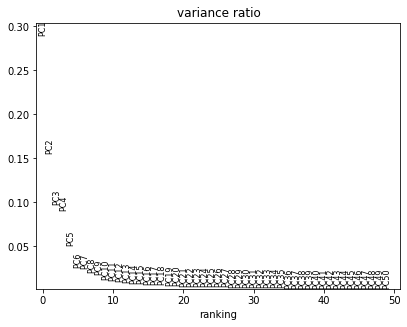

In [11]:
sc.pl.pca_variance_ratio(filtered["prot"], n_pcs=50)

In [12]:
%%time
sc.pp.neighbors(filtered["prot"], n_pcs=20)

CPU times: user 30.4 s, sys: 881 ms, total: 31.3 s
Wall time: 26.3 s


In [13]:
%%time
sc.tl.umap(filtered["prot"])

CPU times: user 2min 32s, sys: 4.21 s, total: 2min 36s
Wall time: 2min 14s


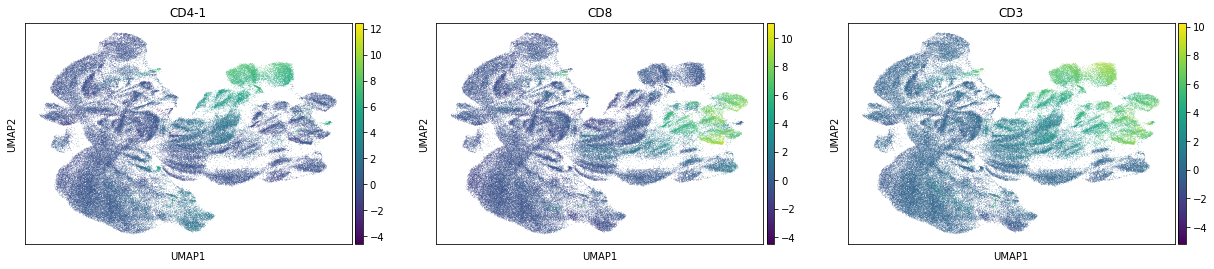

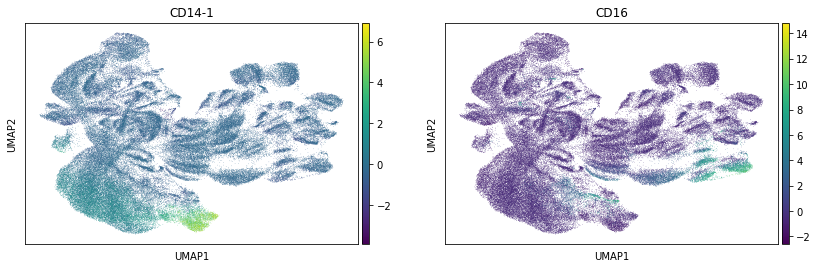

In [14]:
sc.pl.umap(filtered["prot"], color=["CD4-1", "CD8", "CD3"])
sc.pl.umap(filtered["prot"], color=["CD14-1", "CD16"])

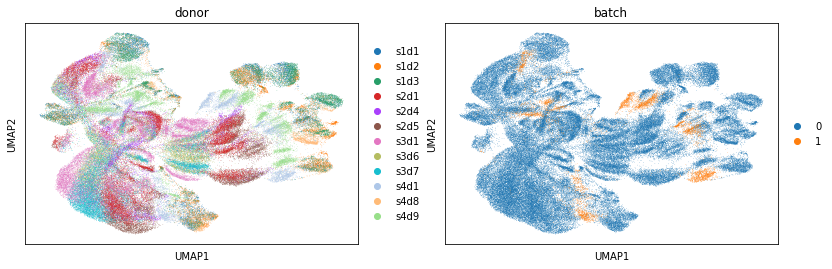

In [15]:
sc.pl.umap(filtered["prot"], color=["donor", "batch"])

As it can be seen in the above UMAP representation, different samples cluster apart from each other for similar populations (see CD4 and CD8 expression in the previous plot). Thus, batch correction of the data would be necessary.

## Key takeaways

TODO

## References

```{bibliography}
:filter: docname in docnames
```